In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
(x_train,y_train),(x_test,y_test)=keras.datasets.mnist.load_data()

In [3]:
len(x_train)

60000

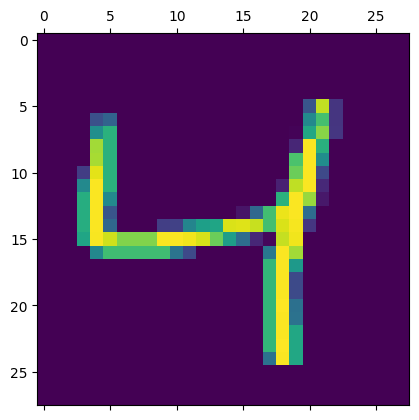

In [4]:
plt.matshow(x_train[2])

In [5]:
x_train=x_train/255
x_test=x_test/255
x_train_flat=x_train.reshape(len(x_train),28*28)
x_test_flat=x_test.reshape(len(x_test),28*28)

In [6]:
model=keras.Sequential([
    keras.layers.Dense(10,input_shape=(784,),activation='sigmoid')
])
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(x_train_flat,y_train,epochs=20)

Epoch 1/20
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4645 - accuracy: 0.8794
Epoch 2/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3033 - accuracy: 0.9154
Epoch 3/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2833 - accuracy: 0.9207
Epoch 4/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2728 - accuracy: 0.9239
Epoch 5/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2666 - accuracy: 0.9262
Epoch 6/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2618 - accuracy: 0.9275
Epoch 7/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2582 - accuracy: 0.9288
Epoch 8/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2558 - accuracy: 0.9294
Epoch 9/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2533 - accuracy: 0.9302
Epoch 10/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.250

In [7]:
model.evaluate(x_test_flat,y_test)

313/313 [==============================] - 1s 1ms/step - loss: 0.2692 - accuracy: 0.9271


[0.26915866136550903, 0.9271000027656555]

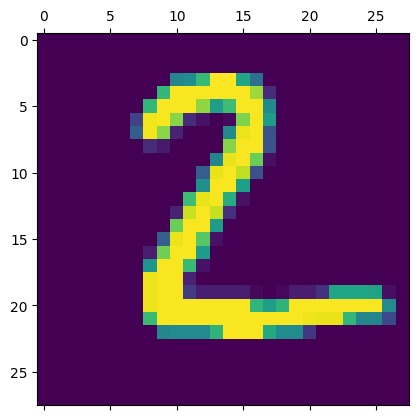

In [8]:
plt.matshow(x_test[1])

In [9]:
y_predict=model.predict(x_test_flat)
y_predict[1]

313/313 [==============================] - 0s 978us/step


array([1.6718522e-01, 3.1860436e-03, 9.9991018e-01, 1.0674284e-02,
       4.4531913e-13, 8.6938351e-01, 9.4083923e-01, 1.4359660e-18,
       2.8263021e-02, 6.0352797e-16], dtype=float32)

In [10]:
np.argmax(y_predict[1])

2

In [11]:
y_predict_labels=[np.argmax(i) for i in y_predict]
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_predict_labels)

In [12]:
import seaborn as sn

In [13]:
plt.figure(figsize=(10,7))

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

Text(50.722222222222214, 0.5, 'Truth')

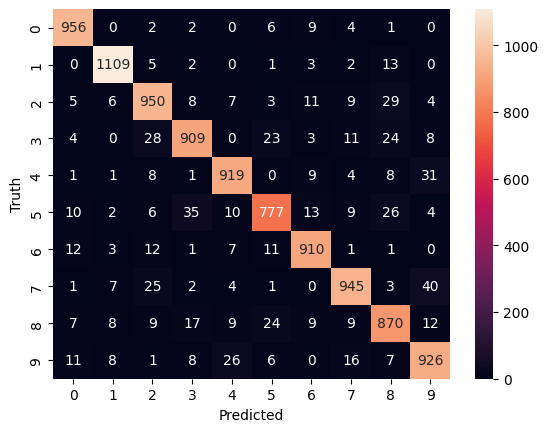

In [14]:
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [15]:
model=keras.Sequential([
    keras.layers.Dense(100,input_shape=(784,),activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(x_train_flat,y_train,epochs=20)

Epoch 1/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2710 - accuracy: 0.9218
Epoch 2/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1221 - accuracy: 0.9644
Epoch 3/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0844 - accuracy: 0.9748
Epoch 4/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0646 - accuracy: 0.9805
Epoch 5/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0518 - accuracy: 0.9842
Epoch 6/20
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0412 - accuracy: 0.9867
Epoch 7/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0349 - accuracy: 0.9888
Epoch 8/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0271 - accuracy: 0.9918
Epoch 9/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0234 - accuracy: 0.9930
Epoch 10/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.019

313/313 [==============================] - 0s 1ms/step


Text(95.72222222222221, 0.5, 'Truth')

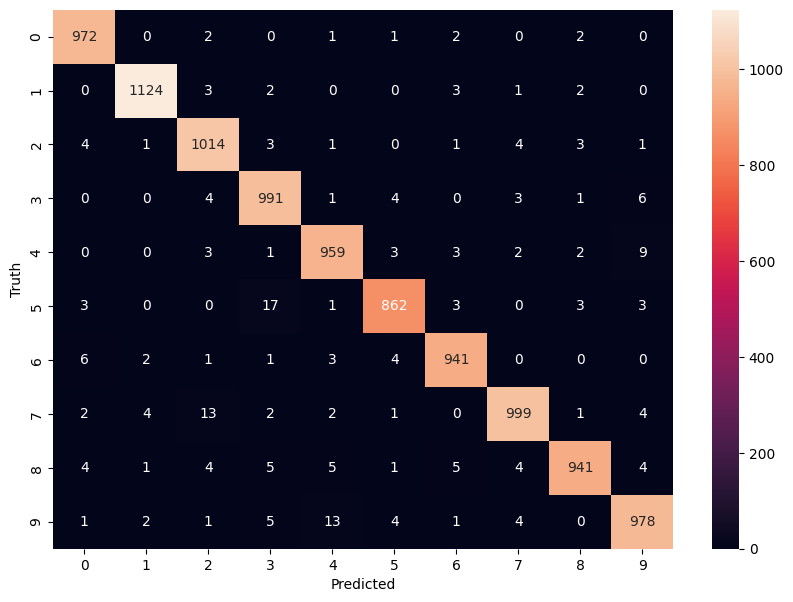

In [16]:
model.evaluate(x_test_flat,y_test)
y_predict=model.predict(x_test_flat)
y_predict_labels=[np.argmax(i) for i in y_predict]
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_predict_labels)
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [21]:
model=keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(100,input_shape=(784,),activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])
tb_callback=tf.keras.callbacks.TensorBoard(log_dir="logs/",histogram_freq=1)
model.compile(
    optimizer='SGD',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(x_train,y_train,epochs=20,callbacks=[tb_callback])

Epoch 1/20
1875/1875 [==============================] - 5s 2ms/step - loss: 0.6465 - accuracy: 0.8363
Epoch 2/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3384 - accuracy: 0.9050
Epoch 3/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2908 - accuracy: 0.9183
Epoch 4/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2620 - accuracy: 0.9266
Epoch 5/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2406 - accuracy: 0.9322
Epoch 6/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2232 - accuracy: 0.9377
Epoch 7/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2085 - accuracy: 0.9418
Epoch 8/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1952 - accuracy: 0.9461
Epoch 9/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1840 - accuracy: 0.9481
Epoch 10/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.173

313/313 [==============================] - 0s 1ms/step


Text(95.72222222222221, 0.5, 'Truth')

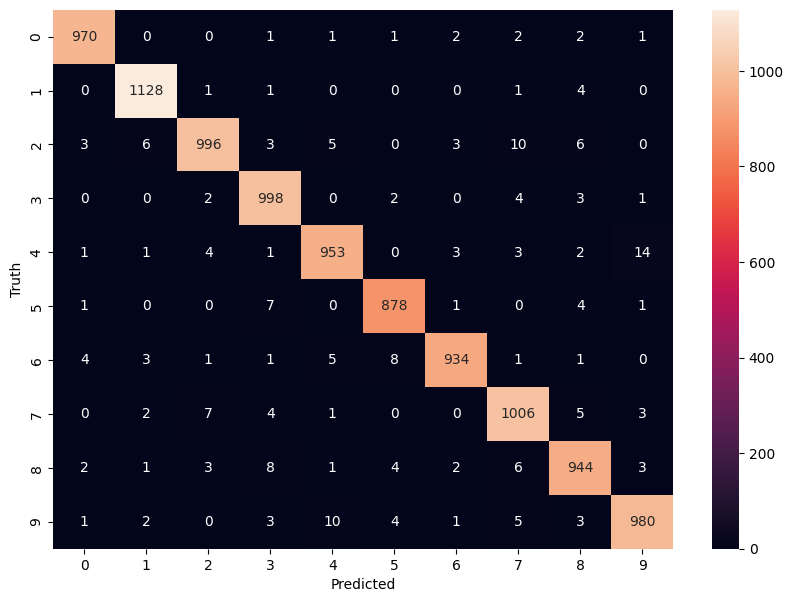

In [18]:
model.evaluate(x_test,y_test)
y_predict=model.predict(x_test)
y_predict_labels=[np.argmax(i) for i in y_predict]
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_predict_labels)
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')